## Установка библиотек

In [1]:
!pip install keybert

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 4.1 MB/s 
     |████████████████████████████████| 235 kB 17.2 MB/s 
     |████████████████████████████████| 51 kB 8.5 MB/s 
     |████████████████████████████████| 4.4 MB 66.9 MB/s 
     |████████████████████████████████| 1.2 MB 59.1 MB/s 
     |████████████████████████████████| 101 kB 14.2 MB/s 
     |████████████████████████████████| 596 kB 72.3 MB/s 
     |████████████████████████████████| 6.6 MB 52.6 MB/s 
  Created wheel for keybert: filename=keybert-0.5.1-py3-none-any.whl size=21332 sha256=50e72097d8d45dd482a84a7fc0498d89b039e05f0ca4c2be03b5e51fcb40da14
  Stored in directory: /root/.cache/pip/wheels/8e/95/c5/f5ceed2a9f9e80bc1a706a10a6fb03d726df7a3dd11800a58b
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=cf8ea09b02e2134f70232cd26ed4bbe85e503efb593234f19e9a6290a041415d
 

In [2]:
!pip install -q pymorphy2 # установка лемматизатора pymorphy2

     |████████████████████████████████| 55 kB 2.2 MB/s 
     |████████████████████████████████| 8.2 MB 15.3 MB/s 


## Подготовка данных

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pymorphy2 # Импортируем для работы с леммами

In [4]:
from keybert import KeyBERT

In [5]:
from bs4 import BeautifulSoup


In [6]:
import nltk
import re

In [7]:
kw_model = KeyBERT(model="DeepPavlov/distilrubert-base-cased-conversational")

Downloading:   0%|          | 0.00/690 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.22k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/538 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/542M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/24.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.40M [00:00<?, ?B/s]

No sentence-transformers model found with name /root/.cache/torch/sentence_transformers/DeepPavlov_distilrubert-base-cased-conversational. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at /root/.cache/torch/sentence_transformers/DeepPavlov_distilrubert-base-cased-conversational were not used when initializing DistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.weight']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
nltk.download() ## omw-1.4 book
 

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> omw-1.4



---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> book


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package chat80 to /root/nltk_data...
       |   Unzipping corpora/chat80.zip.
       | Downloading package cmudict to /root/nltk_data...
       |   Unzipping corpora/cmudict.zip.
       | Downloading package conll2000 to /root/nltk_data...
       |   Unzipping corpora/conll2000.zip.
       | Downloading package conll2002 to /root/nltk_data...
       |   Unzipping corpora/conll2002.zip.
       | Downloading package dependency_treebank to /root/nltk_data...
       |   Unzipping corpora/dependency_treebank.zip.
       | Downloading package genesis to /root/nltk_data...
       |   Unzipping corpora/genesis.zip.
       | Downloading package gutenberg to /root/nltk_data...
       |   Unzipping corpora/gutenberg.zip.
       | Downloading package ieer to /root/nltk_data...
   


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [9]:
lst_stopwords = nltk.corpus.stopwords.words("russian")
lst_stopwords

['и',
 'в',
 'во',
 'не',
 'что',
 'он',
 'на',
 'я',
 'с',
 'со',
 'как',
 'а',
 'то',
 'все',
 'она',
 'так',
 'его',
 'но',
 'да',
 'ты',
 'к',
 'у',
 'же',
 'вы',
 'за',
 'бы',
 'по',
 'только',
 'ее',
 'мне',
 'было',
 'вот',
 'от',
 'меня',
 'еще',
 'нет',
 'о',
 'из',
 'ему',
 'теперь',
 'когда',
 'даже',
 'ну',
 'вдруг',
 'ли',
 'если',
 'уже',
 'или',
 'ни',
 'быть',
 'был',
 'него',
 'до',
 'вас',
 'нибудь',
 'опять',
 'уж',
 'вам',
 'ведь',
 'там',
 'потом',
 'себя',
 'ничего',
 'ей',
 'может',
 'они',
 'тут',
 'где',
 'есть',
 'надо',
 'ней',
 'для',
 'мы',
 'тебя',
 'их',
 'чем',
 'была',
 'сам',
 'чтоб',
 'без',
 'будто',
 'чего',
 'раз',
 'тоже',
 'себе',
 'под',
 'будет',
 'ж',
 'тогда',
 'кто',
 'этот',
 'того',
 'потому',
 'этого',
 'какой',
 'совсем',
 'ним',
 'здесь',
 'этом',
 'один',
 'почти',
 'мой',
 'тем',
 'чтобы',
 'нее',
 'сейчас',
 'были',
 'куда',
 'зачем',
 'всех',
 'никогда',
 'можно',
 'при',
 'наконец',
 'два',
 'об',
 'другой',
 'хоть',
 'после',
 'на

In [10]:
lst_stopwords.extend(['1', '2', '3', '4', '05', '5','6','7','8','9','10','2020','2021', 'г', 'год','наш', 'ответ', 'просьба', 'который', 'данный', 'принять', 'мера', 'последний', 'время', 'течение', 'сутки', 'сегодня', 'весь', 'далее', 'район', 'адрес', 'область', 'это', 'всё', 'также', 'год', 'дом', 'просить', 'улица', 'проблема', 'курск', 'спасибо', 'курский', 'ул', 'здравствуйте', 'здравствуйт', 'добрый', 'день'])

In [11]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    
    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [12]:
df = pd.read_csv("/content/train_dataset_train.csv")

In [13]:
df_test = pd.read_csv("/content/test_dataset_test.csv")

In [14]:
df_test.drop('Тематика', axis = 1, inplace=True)

In [15]:
df_test.drop('Ответственное лицо', axis = 1, inplace=True)

In [16]:
df_test

,id,Текст Сообщения
0,843,<p>Здравствуйте. На улице Мира &nbsp;было заме...
1,1422,<p>Уже вторую неделю не горит уличное освещени...
2,2782,Не работает освещение во дворе дома 11а по Эне...
3,2704,После покоса сорной растительности на газоне м...
4,1,<p>Прошу принять меры к водителю маршрута 263:...
...,...,...
995,2619,"Добрый день! Я и моя семья жители пос Волокно,..."
996,2518,На Лазарева 5 г.Щигры ветка тополя скоро выбье...
997,2524,Перед входом Комитет образования Курска ямы...
998,1577,<p>Доброго времени суток</p><p>У меня на пол г...


In [17]:
morph = pymorphy2.MorphAnalyzer()

In [18]:
morph.parse('сдаются')[0].normal_form

'сдаваться'

In [19]:
def clean_text_basic(text):
   # Инициализируем инструмент для работы с морфемами и более
  cleantext = BeautifulSoup(text, "lxml").text
  cleantext = cleantext.replace('.', ' ')
  cleantext = cleantext.replace(',', ' ')
  cleantext = cleantext.replace('!', ' ')
  cleantext = cleantext.replace('"', ' ')
  cleantext = cleantext.replace('-', ' ')
  cleantext = cleantext.replace(':', ' ')
  cleantext = cleantext.replace('(', ' ')
  cleantext = cleantext.replace(')', ' ')
  cleantext = cleantext.replace('+', ' ')
  cleantext = cleantext.replace('\'', ' ')
  cleantext = cleantext.replace('\t', ' ')
  cleantext = cleantext.replace('\n', ' ')
  cleantext = cleantext.replace('\xa0', ' ')
  words = cleantext.split(' ') #  Разделяем текст по средством пробелов
  filteredWords = []
  for word in words:
    if len(word) > 0:
      filteredWords.append(word)

  return ' '.join(filteredWords)

In [20]:
def clean_text(text):
   # Инициализируем инструмент для работы с морфемами и более
  cleantext = BeautifulSoup(text, "lxml").text
  cleantext = cleantext.replace('.', ' ')
  cleantext = cleantext.replace(',', ' ')
  cleantext = cleantext.replace('!', ' ')
  cleantext = cleantext.replace('"', ' ')
  cleantext = cleantext.replace('-', ' ')
  cleantext = cleantext.replace(':', ' ')
  cleantext = cleantext.replace('(', ' ')
  cleantext = cleantext.replace(')', ' ')
  cleantext = cleantext.replace('+', ' ')
  cleantext = cleantext.replace('\'', ' ')
  cleantext = cleantext.replace('\t', ' ')
  cleantext = cleantext.replace('\n', ' ')
  cleantext = cleantext.replace('\xa0', ' ')
  words = cleantext.split(' ') #  Разделяем текст по средством пробелов
  filteredWords = []
  for word in words:
    if len(word) > 0:
      #filteredWords.append(word)
      filteredWords.append(morph.parse(word)[0].normal_form)

  return ' '.join(filteredWords)

In [21]:
df["clean_text_basic"] = df["Текст Сообщения"].apply(clean_text_basic)

In [22]:
df["clean_text"] = df["Текст Сообщения"].apply(clean_text)

In [23]:
df["clean_theme"] = df["Тематика"].apply(clean_text)

In [24]:
df_test["clean_text_basic"] = df_test["Текст Сообщения"].apply(clean_text_basic)

In [25]:
df_test["clean_text"] = df_test["Текст Сообщения"].apply(clean_text)

In [26]:
df_test["ru_clean_text"] = df_test["clean_text"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=False, 
          lst_stopwords=lst_stopwords))


In [27]:
df["ru_clean_text"] = df["clean_text"].apply(lambda x: 
          utils_preprocess_text(x, flg_stemm=False, flg_lemm=False, 
          lst_stopwords=lst_stopwords))


In [36]:
df['clean_text_basic'][101]

'Прошу Вас убрать мусор в мик не Льгова 2 поворот рядом с магазином МАГНИТ и домом 105 Мусора очень много но никто его не убирает просите учебные заведения что бы они устраивали субботник и что бы все ветки они попилили и убрали весь мусор'

In [31]:
df['clean_text'][101]

'просить вы убрать мусор в мик не льгов 2 поворот рядом с магазин магнит и дом 105 мусор очень много но никто он не убирать просить учебный заведение что бы они устраивать субботник и что бы всё ветка они попилить и убрать весь мусор'

In [28]:
df['ru_clean_text'][101]

'убрать мусор мик льгов поворот рядом магазин магнит 105 мусор очень никто убирать учебный заведение устраивать субботник ветка попилить убрать мусор'

In [29]:
keywords = kw_model.extract_keywords(df['clean_text'][101], top_n=10, stop_words=lst_stopwords)

In [30]:
keywords

[('субботник', 0.5251),
 ('магазин', 0.4841),
 ('заведение', 0.4616),
 ('мусор', 0.4538),
 ('поворот', 0.4448),
 ('убирать', 0.441),
 ('льгов', 0.4317),
 ('устраивать', 0.4297),
 ('убрать', 0.4294),
 ('мик', 0.3798)]

In [32]:
df_test['clean_text'][101]

'дорожный покрытие нет совсем в 2019 год обещать внести в проект на 2020 г но ничего не сделать в 2021 г асфальт уложить на всё соседний улица примыкать к мы мы оставить без дорога'

In [33]:
df[df["Категория"] == 12]['clean_text']

652    не мочь получить сертификат
Name: clean_text, dtype: object

In [34]:
df.drop(index=652, inplace=True)

In [35]:
theme_unique = df['clean_theme'].unique()

In [36]:
text_dict = dict()
for index, row in df.iterrows():
  key = row['clean_theme']
  if key in text_dict:
    text_dict[key] += ' ' + row['ru_clean_text']
  else:
    text_dict[key] = row['ru_clean_text']

In [37]:
text_dict['вакцинация от covid 19']

'март сделать прививка горшеченский больница сертификат май сделать второй прививка covid 19 электронный сертификат госуслуга сей пора 17 пройти второй вакцинация covid 19 сертификат портал госуслуга поступить сделать вакцинация ковид 19 место работа медучреждение фгубз мсч 125 фмба россия медико санитарный часть 125 первый вакцинация 17 02 2021г второй вакцинация 03 2021г медучреждение делать вакцинация 307251 обл курчатов пр коммунистический 38 сей пора сертификат пройти месяц скан вакцинация прилагать нужно срочно сертификат еда отпуск вакцинироваться заранее жена вакцинироваться воронеж следующий прийти сертификат вакцинирование второй вакцинация пройти июнь сертификат портал госуслуга появиться понедельник 24 21 заместитель губернатор белостоцкий еженедельный планёрка губернатор озвучить поступление вакцина ковивак центр чумаков подсказать пожалуйста конкретно учреждение здравоохранение поступить вакцина произвести вакцинация именно вакцина ковид19 никакой данные второй вакцина се

In [38]:
text_dict['неоформленный трудовой отношение']

'подать документ участие конкурс включение резерв руководящий должность госслужба позвонить пригласить тестирование телефон сказать прибыть 18 03 12 00 интернациональный прохождение тест подробный информация указать неверный выясниться прибыть академия госслужба предложить пройти компьютер тест состоять 100 вопрос тест заранее ознакомить тематика итог получить 100 балл 59 отвечать вопрос сталкиваться никак жизнь итог пройти второй этап считать проведение тест цель провести отбор длить галочки вакантный место занять нужные человек коррупция образ победить знать тема тест подготовиться набрать нужный количество балл образование опыт работа личный высокий ответственность мочь пригодиться край оставить внимание письмо'

In [39]:
def find_frequantly_words(text, stop_words, max_words = 10):
  word_dict = dict()
  word_arr = text.split(' ')
  for i in word_arr:
    if i not in stop_words:
      if i in word_dict:
        word_dict[i] += 1
      else:
        word_dict[i] = 1
  
  sorted_dict = dict(sorted(word_dict.items(), key=lambda item: -item[1]))
  res = []
  index = 0
  for key,value in sorted_dict.items():
    if index < max_words:
      res.append(key)
    else:
      break
    index += 1
  return res


In [40]:
find_frequantly_words(text_dict['вакцинация от covid 19'], lst_stopwords, 20)

['вакцинация',
 'сертификат',
 'второй',
 'вакцина',
 'госуслуга',
 'сделать',
 '19',
 'пройти',
 'прививка',
 'covid',
 'электронный',
 'сей',
 'пора',
 '17',
 'портал',
 'поступить',
 'ковид',
 'медучреждение',
 '125',
 'первый']

In [41]:
find_frequantly_words(text_dict['неприятный запах'], lst_stopwords, 20)

['запах',
 'вонь',
 'грибной',
 'радуга',
 'появиться',
 'неприятный',
 'отход',
 'производство',
 'канализация',
 'поле',
 'дым',
 'ребёнок',
 'находиться',
 'окно',
 'открыть',
 'появляться',
 'территория',
 'едкий',
 'мочь',
 'разный']

In [42]:
frequntly_dict = dict()
for key,value in text_dict.items():
  frequntly_dict[key] = find_frequantly_words(text_dict[key], lst_stopwords, 40)

In [43]:
val = 1
val2 = 1
weight = []
sum = 0
for i in range(40):
  val += val2
  val2 += 0.055
  weight.append(val2)
  sum += val2
#weight.append(16)
sum += 16
print(sum)
weight.reverse()

101.09999999999998


In [44]:
weight

[3.2000000000000024,
 3.1450000000000022,
 3.090000000000002,
 3.035000000000002,
 2.9800000000000018,
 2.9250000000000016,
 2.8700000000000014,
 2.8150000000000013,
 2.760000000000001,
 2.705000000000001,
 2.650000000000001,
 2.5950000000000006,
 2.5400000000000005,
 2.4850000000000003,
 2.43,
 2.375,
 2.32,
 2.2649999999999997,
 2.2099999999999995,
 2.1549999999999994,
 2.099999999999999,
 2.044999999999999,
 1.9899999999999989,
 1.934999999999999,
 1.879999999999999,
 1.824999999999999,
 1.7699999999999991,
 1.7149999999999992,
 1.6599999999999993,
 1.6049999999999993,
 1.5499999999999994,
 1.4949999999999994,
 1.4399999999999995,
 1.3849999999999996,
 1.3299999999999996,
 1.2749999999999997,
 1.2199999999999998,
 1.1649999999999998,
 1.1099999999999999,
 1.055]

In [45]:
def find_theme_by_frequntly(text, by_count = True):
  word_arr = text.split(' ')
  max_words = 0
  max_theme = ''
  for key,value in frequntly_dict.items():
    weight_words = 0
    count_words = 0
    #print(key)
    for word in word_arr:
      if word in value:
        count_words += 1
        word_index = value.index(word)
        weight_words += weight[word_index]
        #print(' ', word, word_index, weight_words)
    if by_count:
      if count_words > max_words:
        max_words = count_words
        max_theme = key
    else:
      if weight_words > max_words:
        max_words = weight_words
        max_theme = key
  return max_theme
    

In [46]:
def find_theme_by_frequntly2(text):
  word_arr = text.split(' ')
  max_words = 0
  max_theme = ''
  for key,value in frequntly_dict.items():
    weight_words = 0
    count_words = 0
    #print(key)
    #value = value[:10]
    for word in word_arr:
      if word in value:
        count_words += 1
    
    if count_words > max_words:
      max_words = count_words
      max_theme = key
    
  return max_theme
    

In [47]:
def find_theme_by_frequntly3(text, by_count = True):
  keywords = kw_model.extract_keywords(text, top_n=10, stop_words=lst_stopwords)
  word_arr = text.split(' ')
  keywords_list = []
  for i in keywords:
    keywords_list.append(i[0])
  max_words = 0
  max_theme = ''
  for key,value in frequntly_dict.items():
    count_words = 0
    weight_words = 0
    for word in word_arr:
      if word in value:
        count_words += 1
        word_index = value.index(word)
        weight_words += weight[word_index]
    for word in keywords_list:
      if word in value:
        count_words += 1
        word_index = value.index(word)
        weight_words += weight[word_index]
    if by_count:
      if count_words > max_words:
        max_words = count_words
        max_theme = key
    else:
      if weight_words > max_words:
        max_words = weight_words
        max_theme = key
  return max_theme
    

In [48]:
df['clean_theme'][4]

'аварийный дерево'

In [49]:
df['ru_clean_text'][3]

'пересечение сосновский береговой завалить песок гравий санитарный зона участок относиться муп кгтпо центральный рынок невозможно пройти проехать коляска'

In [50]:
find_theme_by_frequntly(df['ru_clean_text'][4], False)

'аварийный дерево'

In [53]:
df['find_theme1'] = df['ru_clean_text'].apply(lambda x: find_theme_by_frequntly(x, False))

In [54]:
df['find_theme2'] = df['ru_clean_text'].apply(find_theme_by_frequntly2)

In [57]:
df['find_theme3'] = df['ru_clean_text'].apply(lambda x: find_theme_by_frequntly3(x, False))

In [58]:
count_theme1 = 0
count_theme2 = 0
count_theme3 = 0
for inx, row in df.iterrows():
  if row['clean_theme'] == row['find_theme1']:
    count_theme1 += 1
  if row['clean_theme'] == row['find_theme2']:
    count_theme2 += 1
  if row['clean_theme'] == row['find_theme3']:
    count_theme3 += 1
  

In [59]:
count_theme1

1436

In [60]:
count_theme2 

1430

In [61]:
count_theme3

1436

In [62]:
df_test['find_theme1'] = df_test['ru_clean_text'].apply(lambda x: find_theme_by_frequntly(x, False))

In [63]:
df_test['find_theme2'] = df_test['ru_clean_text'].apply(find_theme_by_frequntly2)

In [64]:
df_test['find_theme3'] = df_test['ru_clean_text'].apply(lambda x: find_theme_by_frequntly3(x, False))

In [65]:
df_test

,id,Текст Сообщения,clean_text_basic,clean_text,ru_clean_text,find_theme1,find_theme2,find_theme3
0,843,<p>Здравствуйте. На улице Мира &nbsp;было заме...,Здравствуйте На улице Мира было заменено наруж...,здравствуйте на улица мир быть заменить наружн...,мир заменить наружное освещение именно заменит...,неработающий наружное освещение,неработающий наружное освещение,неработающий наружное освещение
1,1422,<p>Уже вторую неделю не горит уличное освещени...,Уже вторую неделю не горит уличное освещение,уже второй неделя не гореть уличный освещение,второй неделя гореть уличный освещение,неработающий наружное освещение,неработающий наружное освещение,неработающий наружное освещение
2,2782,Не работает освещение во дворе дома 11а по Эне...,Не работает освещение во дворе дома 11а по Эне...,не работать освещение в двор дом 11а по энерге...,работать освещение двор 11а энергетик световой...,неработающий наружное освещение,неработающий наружное освещение,неработающий наружное освещение
3,2704,После покоса сорной растительности на газоне м...,После покоса сорной растительности на газоне м...,после покос сорный растительность на газон меж...,покос сорный растительность газон тротуар прое...,неудовлетворительный содержание клумба и газон,неудовлетворительный содержание клумба и газон,неудовлетворительный содержание клумба и газон
4,1,<p>Прошу принять меры к водителю маршрута 263:...,Прошу принять меры к водителю маршрута 263 пос...,просить принять мера к водитель маршрут 263 по...,водитель маршрут 263 пос северный союзный авто...,недостаточный количество транспорт на маршрут ...,нарушение правило посадка и высадка пассажир п...,недостаточный количество транспорт на маршрут ...
...,...,...,...,...,...,...,...,...
995,2619,"Добрый день! Я и моя семья жители пос Волокно,...",Добрый день Я и моя семья жители пос Волокно м...,добрый день я и мой семья житель пос волокно м...,семья житель пос волокно просыпаться засыпать ...,некачественный водоснабжение в район частное с...,некачественный водоснабжение в район частное с...,некачественный водоснабжение в район частное с...
996,2518,На Лазарева 5 г.Щигры ветка тополя скоро выбье...,На Лазарева 5 г Щигры ветка тополя скоро выбье...,на лазарев 5 г щигры ветка тополь скоро выбить...,лазарев щигры ветка тополь скоро выбить стекло...,аварийный дерево,аварийный дерево,аварийный дерево
997,2524,Перед входом Комитет образования Курска ямы...,Перед входом Комитет образования Курска ямы на...,перед вход комитет образование курск ям на дорога,вход комитет образование ям дорога,нарушение дорожный покрытие ям на дорога в гра...,нарушение дорожный покрытие ям на дорога в гра...,нарушение дорожный покрытие ям на дорога в гра...
998,1577,<p>Доброго времени суток</p><p>У меня на пол г...,Доброго времени сутокУ меня на пол года был ме...,добрый время суток я на пол год быть медотвод ...,суток пол медотвод вакцинация перенести заболе...,вопрос оказание помощь беженец,неприятный запах,вопрос оказание помощь беженец


In [66]:
def categoryToOHE(cat, len):
  ohe = [0.] * len
  if cat >= len:
    ohe[len - 1] = 1.
  else:
    ohe[cat] = 1.
  return ohe


In [67]:
theme_dict = dict()
index = 0
for u in theme_unique:
  theme_dict[u] = index
  index += 1

In [68]:
len(theme_dict)

160

In [69]:
theme_dict['нарушение дорожный покрытие ям на дорога в граница городской округ и сельский поселение']

12

In [70]:

classes = list(df['Категория'].values) #Извлекаем соответствующие им значения классов (лейблов) столбца Категория
classesOHE = []
for i in classes:
  classesOHE.append(categoryToOHE(i,17))
classesOHE = np.array(classesOHE)

In [71]:
classesOHE[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [72]:
def themeToOHE(text, len):
  arr = [0.0] * len
  if text in theme_dict:
    idx = theme_dict[text]
  else:
    idx = 12 ## самая часто всречаемая категория
  arr[idx] = 1.0
  return arr

In [73]:

themes = list(df['clean_theme'].values) #Извлекаем соответствующие им значения классов (лейблов) столбца Категория
themesOHE = []
for i in themes:
  themesOHE.append(themeToOHE(i,160))
themesOHE = np.array(themesOHE)

In [78]:

themes_test = list(df_test['find_theme'].values) #Извлекаем соответствующие им значения классов (лейблов) столбца Категория
themes_testOHE = []
for i in themes_test:
  themes_testOHE.append(themeToOHE(i,160))
themes_testOHE = np.array(themes_testOHE)

KeyError: ignored

## Keras

In [75]:


from tensorflow.keras import utils # Для работы с категориальными данными
from tensorflow.keras.models import Sequential # Полносвязная модель
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Dropout, LSTM, Conv1D, MaxPooling1D,GlobalMaxPooling1D, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation # Слои для сети

from sklearn.preprocessing import LabelEncoder # Метод кодирования тестовых лейблов
from sklearn.model_selection import train_test_split # Для разделения выборки на тестовую и обучающую

import time # Импортируем библиотеку time

In [76]:
# разбиваем все данные на обучающую и тестовую выборки с помощью метода train_test_split из библиотеки sklearn
xTrain, xVal, yTrain, yVal = train_test_split(themesOHE, classesOHE, test_size=0.1, random_state=1313)
print(xTrain.shape) #посмотрим на форму текстов из обучающей выборки
print(yTrain.shape) #и на форму соответсвующих им классов

(1799, 160)
(1799, 17)


In [77]:
#Создаём полносвязную сеть
model01 = Sequential()
#Входной полносвязный слой
model01.add(Dense(100, input_dim=160, activation="linear"))
#Слой регуляризации Dropout
model01.add(Dropout(0.2))
#Третий полносвязный слой
model01.add(Dense(100, activation='linear'))
#Слой регуляризации Dropout
#model01.add(Dropout(0.2))
#Выходной полносвязный слой
model01.add(Dense(17, activation='softmax'))


model01.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

#Обучаем сеть на выборке
history = model01.fit(xTrain, 
                    yTrain, 
                    epochs=100,
                    batch_size=8,
                    validation_data=(xVal, yVal))



Epoch 1/100
225/225 [==============================] - 2s 3ms/step - loss: 2.5825 - accuracy: 0.4647 - val_loss: 2.3141 - val_accuracy: 0.6000
Epoch 2/100
225/225 [==============================] - 1s 3ms/step - loss: 1.8563 - accuracy: 0.6148 - val_loss: 1.5467 - val_accuracy: 0.5400
Epoch 3/100
225/225 [==============================] - 1s 5ms/step - loss: 1.2110 - accuracy: 0.6442 - val_loss: 1.1917 - val_accuracy: 0.6600
Epoch 4/100
225/225 [==============================] - 1s 3ms/step - loss: 0.9330 - accuracy: 0.7582 - val_loss: 0.9932 - val_accuracy: 0.7150
Epoch 5/100
225/225 [==============================] - 1s 3ms/step - loss: 0.7615 - accuracy: 0.7993 - val_loss: 0.8382 - val_accuracy: 0.7700
Epoch 6/100
225/225 [==============================] - 1s 3ms/step - loss: 0.6264 - accuracy: 0.8410 - val_loss: 0.7116 - val_accuracy: 0.8350
Epoch 7/100
225/225 [==============================] - 1s 3ms/step - loss: 0.5298 - accuracy: 0.8722 - val_loss: 0.6108 - val_accuracy: 0.8450

In [174]:
from keras import backend as K
# Change learning rate to 0.001 and train for 50 more epochs
K.set_value(model01.optimizer.learning_rate, 0.00001)
print("Learning rate before second fit:", model01.optimizer.learning_rate.numpy())

Learning rate before second fit: 1e-05


In [175]:
#Обучаем сеть на выборке
history = model01.fit(xTrain, 
                    yTrain, 
                    epochs=50,
                    batch_size=8,
                    validation_data=(xVal, yVal))


Epoch 1/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0923 - val_accuracy: 0.9700
Epoch 2/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0923 - val_accuracy: 0.9700
Epoch 3/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0923 - val_accuracy: 0.9700
Epoch 4/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0922 - val_accuracy: 0.9700
Epoch 5/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0922 - val_accuracy: 0.9700
Epoch 6/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0922 - val_accuracy: 0.9700
Epoch 7/100
225/225 [==============================] - 1s 3ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0921 - val_accuracy: 0.9700

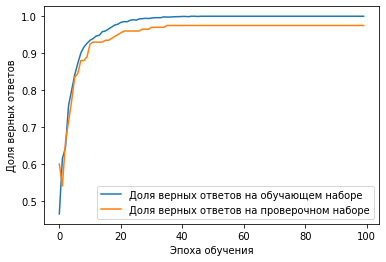

In [82]:
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [79]:
pred = model01.predict(themes_testOHE)

In [80]:
pred

array([[1.1531207e-10, 1.0394793e-10, 6.4041675e-11, ..., 2.2854196e-11,
        6.1296178e-13, 5.3560771e-12],
       [1.1531207e-10, 1.0394793e-10, 6.4041675e-11, ..., 2.2854196e-11,
        6.1296178e-13, 5.3560771e-12],
       [1.1531207e-10, 1.0394793e-10, 6.4041675e-11, ..., 2.2854196e-11,
        6.1296178e-13, 5.3560771e-12],
       ...,
       [1.0000000e+00, 2.1463411e-09, 7.5488001e-12, ..., 3.0272776e-12,
        1.3590724e-12, 2.8837481e-09],
       [4.8394938e-10, 1.0437612e-06, 4.0690898e-05, ..., 4.4424331e-05,
        4.6158527e-04, 9.4881003e-08],
       [1.1424048e-14, 3.8226347e-09, 5.9702649e-07, ..., 1.7295652e-07,
        2.5411580e-06, 1.8747646e-11]], dtype=float32)

In [81]:
pred_final = np.argmax(pred, axis=1)

In [83]:
pred_final

array([ 3,  3,  3,  3,  8,  3,  3,  3,  0,  4,  2,  3,  3,  3, 16,  0,  8,
        3,  3,  0,  3,  0, 16,  0,  3,  3,  3, 10,  3, 16,  4,  0,  0,  8,
        3,  3,  4,  3,  3,  3,  0,  3,  1,  3,  3,  4, 11,  0,  8,  3,  0,
        8,  3,  3,  0, 16,  0,  1, 16,  0,  3,  0,  3, 16,  3,  3,  3,  3,
        8,  3,  0,  3,  3, 11,  0,  0,  3,  0, 16,  3,  3,  3,  3,  4,  3,
        0,  0,  3,  3, 16,  3,  4,  0,  8,  3,  3,  3,  3,  0,  0,  3,  0,
        3, 16,  3,  3,  3, 16,  3,  3,  0,  0,  0, 16,  0,  8,  3,  3,  3,
        3,  7,  0,  8,  3,  3,  0,  3,  3,  3,  8, 10,  3,  4,  3,  0,  3,
        3,  0,  4,  7,  8,  4,  0,  0,  0,  8,  0,  0,  7,  3,  8,  0,  0,
        0,  0,  3,  0, 11,  3, 15,  3,  3,  3, 10,  3,  8,  3,  0, 11,  3,
        3,  0,  7,  0,  3,  3,  8,  8,  3, 16,  3,  3,  0,  3,  8,  0,  3,
        3, 16,  3,  3,  8,  3,  3, 16,  3,  0,  3, 16,  3,  3,  3,  3,  6,
        8,  1,  8,  0, 16,  0,  8,  8,  7,  4,  4, 16,  3,  3,  0,  8, 16,
        0,  3,  3,  3,  0

In [84]:
df_test['pred'] = pred_final

In [85]:
df_test

,id,Текст Сообщения,clean_text_basic,clean_text,ru_clean_text,find_theme1,find_theme2,find_theme3,pred
0,843,<p>Здравствуйте. На улице Мира &nbsp;было заме...,Здравствуйте На улице Мира было заменено наруж...,здравствуйте на улица мир быть заменить наружн...,мир заменить наружное освещение именно заменит...,неработающий наружное освещение,неработающий наружное освещение,неработающий наружное освещение,3
1,1422,<p>Уже вторую неделю не горит уличное освещени...,Уже вторую неделю не горит уличное освещение,уже второй неделя не гореть уличный освещение,второй неделя гореть уличный освещение,неработающий наружное освещение,неработающий наружное освещение,неработающий наружное освещение,3
2,2782,Не работает освещение во дворе дома 11а по Эне...,Не работает освещение во дворе дома 11а по Эне...,не работать освещение в двор дом 11а по энерге...,работать освещение двор 11а энергетик световой...,неработающий наружное освещение,неработающий наружное освещение,неработающий наружное освещение,3
3,2704,После покоса сорной растительности на газоне м...,После покоса сорной растительности на газоне м...,после покос сорный растительность на газон меж...,покос сорный растительность газон тротуар прое...,неудовлетворительный содержание клумба и газон,неудовлетворительный содержание клумба и газон,неудовлетворительный содержание клумба и газон,3
4,1,<p>Прошу принять меры к водителю маршрута 263:...,Прошу принять меры к водителю маршрута 263 пос...,просить принять мера к водитель маршрут 263 по...,водитель маршрут 263 пос северный союзный авто...,недостаточный количество транспорт на маршрут ...,нарушение правило посадка и высадка пассажир п...,недостаточный количество транспорт на маршрут ...,8
...,...,...,...,...,...,...,...,...,...
995,2619,"Добрый день! Я и моя семья жители пос Волокно,...",Добрый день Я и моя семья жители пос Волокно м...,добрый день я и мой семья житель пос волокно м...,семья житель пос волокно просыпаться засыпать ...,некачественный водоснабжение в район частное с...,некачественный водоснабжение в район частное с...,некачественный водоснабжение в район частное с...,3
996,2518,На Лазарева 5 г.Щигры ветка тополя скоро выбье...,На Лазарева 5 г Щигры ветка тополя скоро выбье...,на лазарев 5 г щигры ветка тополь скоро выбить...,лазарев щигры ветка тополь скоро выбить стекло...,аварийный дерево,аварийный дерево,аварийный дерево,3
997,2524,Перед входом Комитет образования Курска ямы...,Перед входом Комитет образования Курска ямы на...,перед вход комитет образование курск ям на дорога,вход комитет образование ям дорога,нарушение дорожный покрытие ям на дорога в гра...,нарушение дорожный покрытие ям на дорога в гра...,нарушение дорожный покрытие ям на дорога в гра...,0
998,1577,<p>Доброго времени суток</p><p>У меня на пол г...,Доброго времени сутокУ меня на пол года был ме...,добрый время суток я на пол год быть медотвод ...,суток пол медотвод вакцинация перенести заболе...,вопрос оказание помощь беженец,неприятный запах,вопрос оказание помощь беженец,10


In [86]:
data = [df_test["id"], df_test["pred"]]

headers = ["id", "Категория"]

df_submit = pd.concat(data, axis=1, keys=headers)

In [87]:
df_submit

,id,Категория
0,843,3
1,1422,3
2,2782,3
3,2704,3
4,1,8
...,...,...
995,2619,3
996,2518,3
997,2524,0
998,1577,10


In [88]:
df_submit.to_csv('submit.csv', index=False)